## Alzheimer's Risk Prediction: 
## Phase 1 - Data Exploration & Preprocessing
In this initial phase, our goal is to load, inspect, clean, and understand the Alzheimer's Disease dataset. A thorough Exploratory Data Analysis (EDA) is crucial for building a robust machine learning model.

#### 1. Setup and Initial Data Loading
First, we import the necessary Python libraries for data manipulation and visualization and load our dataset into a pandas DataFrame.

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Suppress warnings for cleaner output
import warnings
ImportWarning = "ignore"    

# Set a style for all plots
sns.set_style("whitegrid")

# Load the dataset
file_path = 'data/alzheimers_Disease_data.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows to get an initial look
print(df.head())

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

#### 2. Initial Data Inspection
We'll perform a basic check to understand the dataset's structure, data types, and identify potential issues like missing values.

In [2]:
# Get a concise summary of the dataframe
# This includes column names, non-null counts, and data types (dtypes)
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 

In [3]:
# Generate descriptive statistics for numerical columns
print(df.describe())

         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.00

The .info() method is our first step in identifying missing data. If any "Non-Null Count" is lower than the total number of entries, we have missing values to address. .describe() helps us spot potential outliers or anomalies (e.g., an age of 200 or a BMI of 0).

#### 3. Data Cleaning and Preprocessing
Based on our initial inspection, we will clean the data to prepare it for analysis and modeling.

In [4]:
# Drop columns that are irrelevant for prediction: PatientID is a unique identifier and DoctorInCharge contains no useful information.
df_cleaned = df.drop(['PatientID', 'DoctorInCharge'], axis=1)

# Check for missing values in the entire dataframe
print(df_cleaned.isnull().sum())

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

Here, we remove PatientID because it provides no predictive power and DoctorInCharge because it's a confidential placeholder.

In [5]:
# Check for and remove any duplicate rows
duplicate_count = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    df_cleaned.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

print("\nData cleaning complete. Shape of cleaned data:", df_cleaned.shape)


Number of duplicate rows: 0

Data cleaning complete. Shape of cleaned data: (2149, 33)


We confirm the dataset is clean of nulls and duplicates, ensuring data quality for the next steps.

#### 4. Exploratory Data Analysis (EDA) & Visualization
Now we dive deeper to uncover patterns, relationships, and insights.

#### Target Variable Distribution

First, let's see how many patients fall into each diagnostic category.

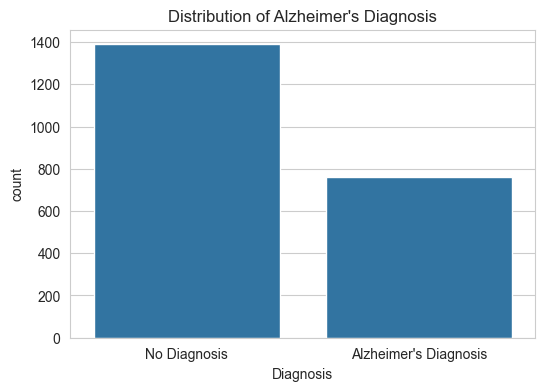

In [6]:
# Visualize the distribution of the Diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df_cleaned)
plt.title('Distribution of Alzheimer\'s Diagnosis')
plt.xticks([0, 1], ['No Diagnosis', 'Alzheimer\'s Diagnosis'])
plt.show()

We can check if the dataset is balanced or imbalanced, which will be important for model evaluation in Phase 2.

#### Correlation Analysis
A heatmap helps us see how different numerical features relate to each other and to the diagnosis.

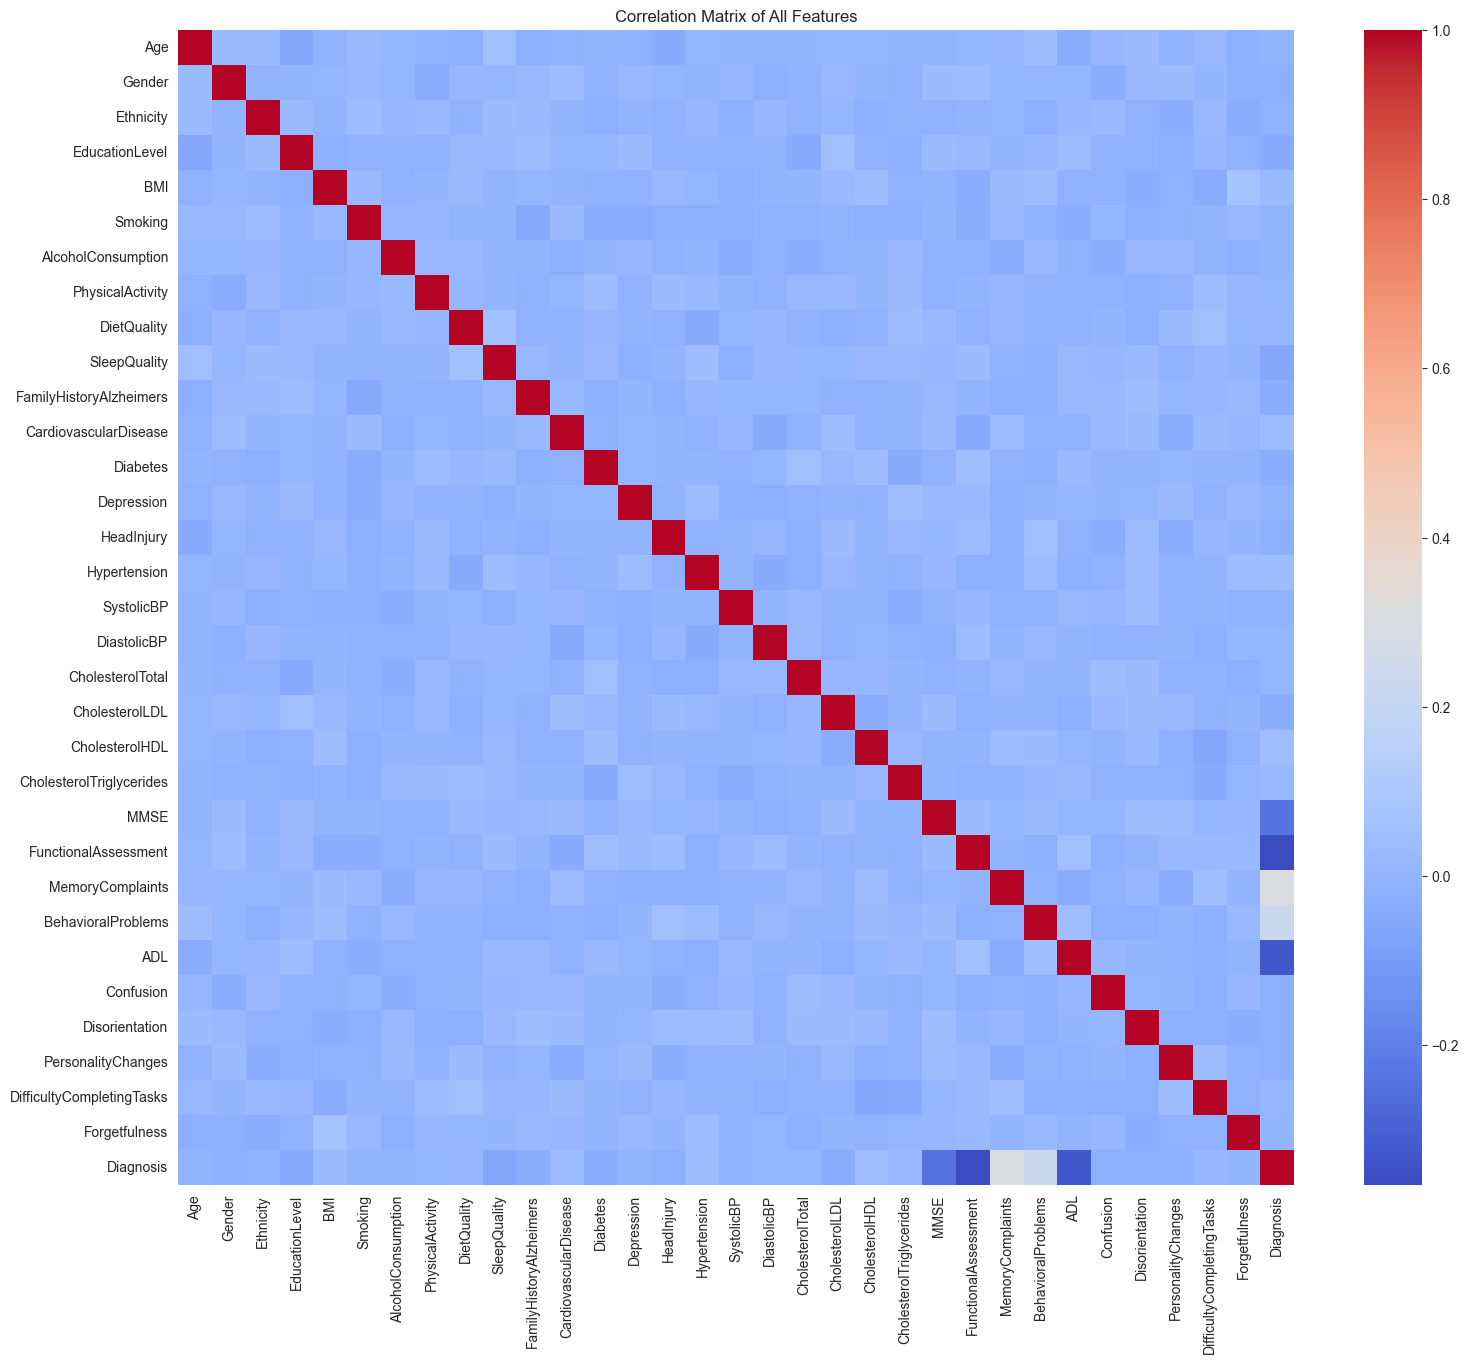

In [7]:
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()

Most variables show weak correlations with one another, suggesting low multicollinearity. A few features such as `MMSE`, `FunctionalAssessment`, and `Diagnosis` exhibit moderate negative correlations, potentially indicating relevance for cognitive health-related outcomes.

#### Distributions of Key Features by Diagnosis
Let's compare key features for patients with and without an Alzheimer's diagnosis.

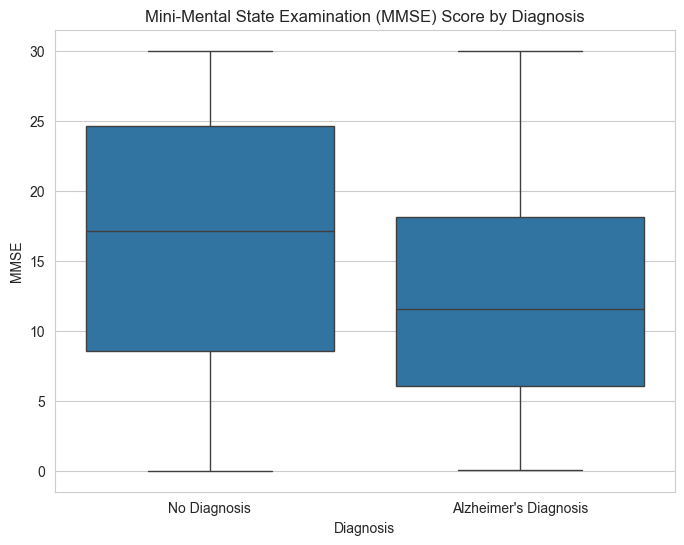

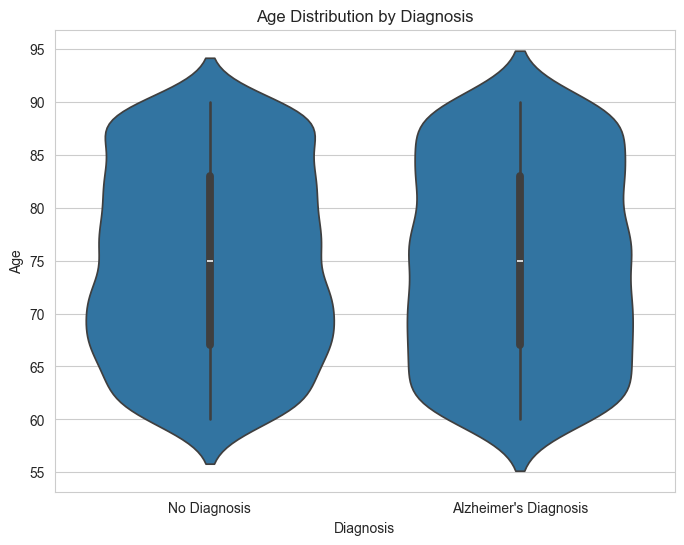

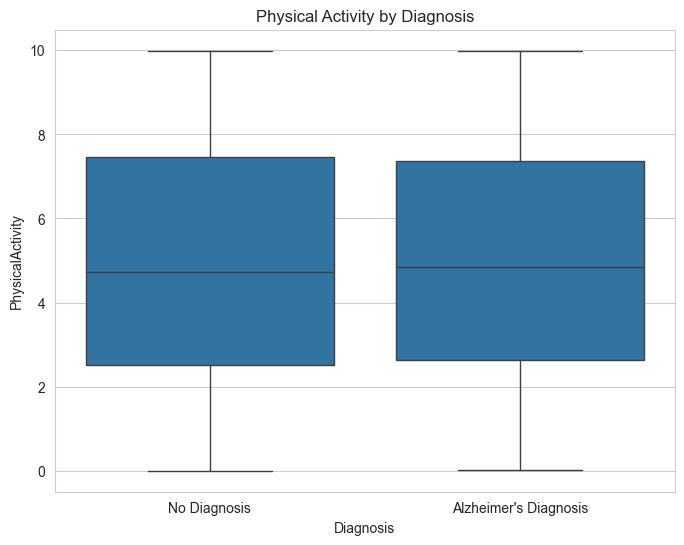

In [8]:
# Comparing MMSE scores
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='MMSE', data=df_cleaned)
plt.title('Mini-Mental State Examination (MMSE) Score by Diagnosis')
plt.xticks([0, 1], ['No Diagnosis', 'Alzheimer\'s Diagnosis'])
plt.show()

# Comparing Age
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diagnosis', y='Age', data=df_cleaned)
plt.title('Age Distribution by Diagnosis')
plt.xticks([0, 1], ['No Diagnosis', 'Alzheimer\'s Diagnosis'])
plt.show()

# Comparing Physical Activity
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='PhysicalActivity', data=df_cleaned)
plt.title('Physical Activity by Diagnosis')
plt.xticks([0, 1], ['No Diagnosis', 'Alzheimer\'s Diagnosis'])
plt.show()

The boxplot for MMSE clearly shows that the median score is significantly lower for diagnosed patients. The violin plot for Age illustrates that the diagnosis is more common in older individuals. These plots provide strong evidence for which features will be important predictors.

#### 5. Detailed Numerical Feature Distributions
While we looked at Age and MMSE, let's systematically visualize the distributions of all key numerical health indicators, separated by diagnosis. This helps us see if the overall shape and center of the distributions differ between the two groups.

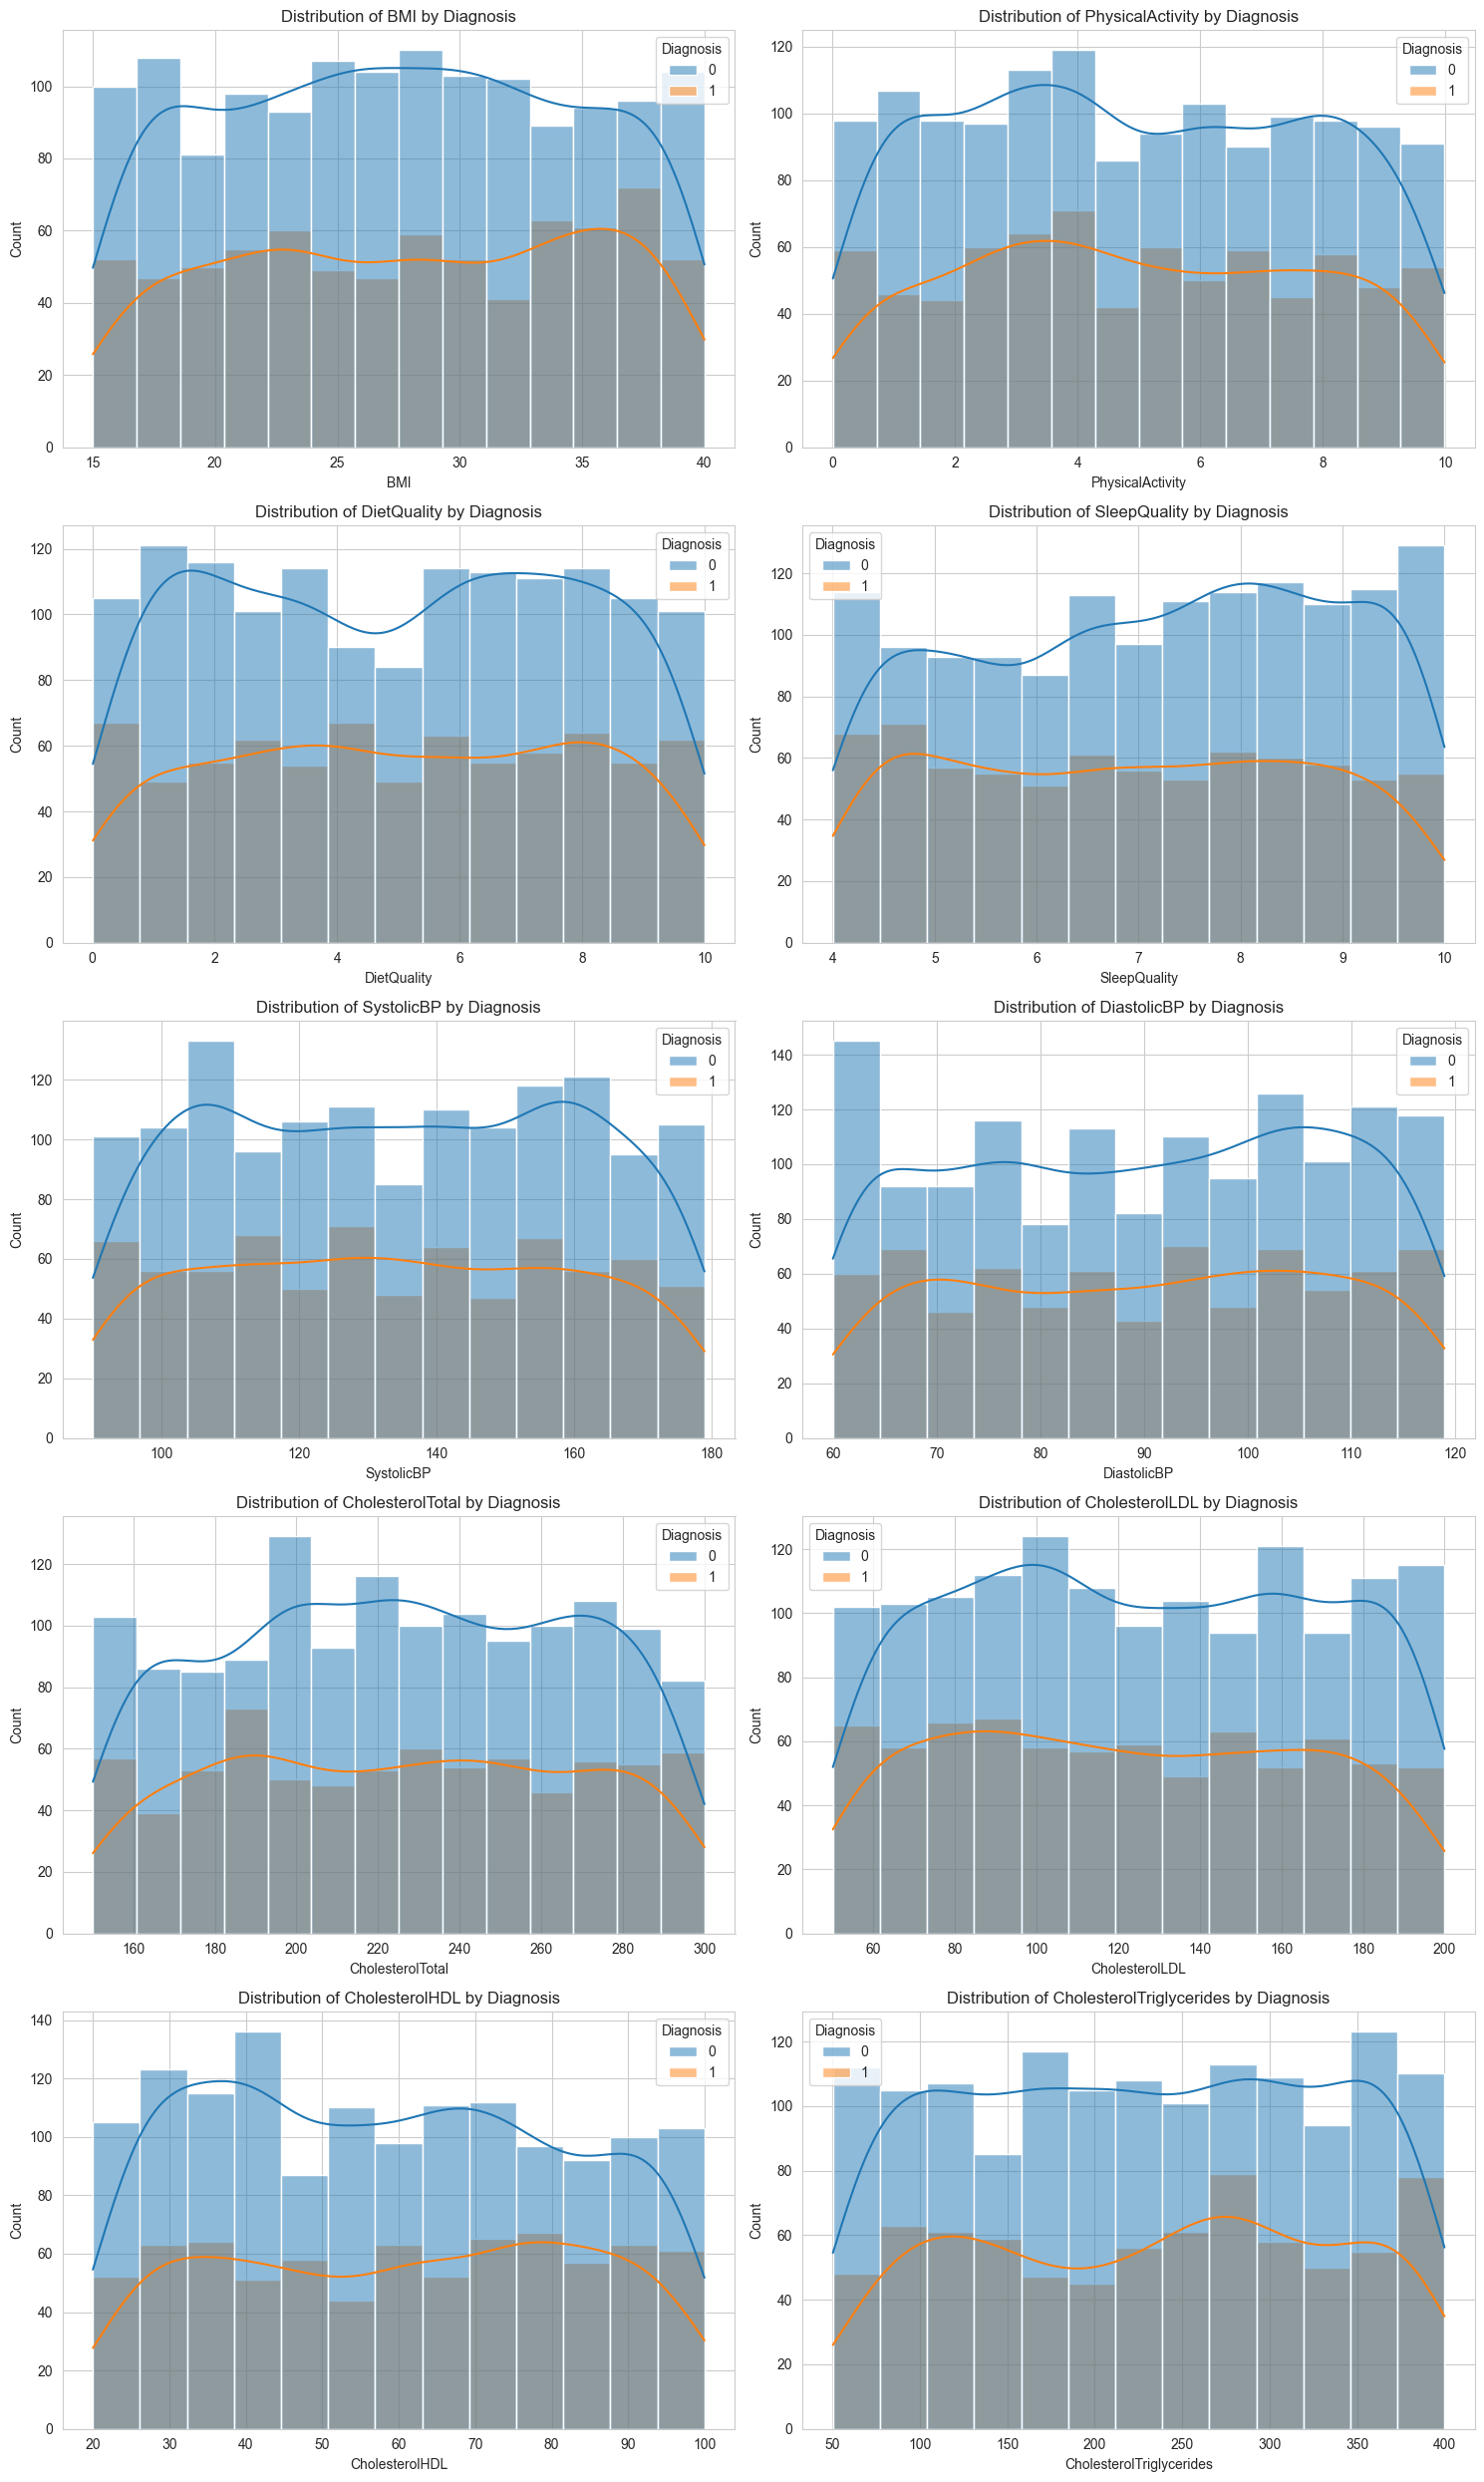

In [9]:
# List of key numerical features to plot
numerical_features_to_plot = [
    'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
    'CholesterolHDL', 'CholesterolTriglycerides'
]

# Create histograms for each feature
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten() # Flatten the 2D array of axes to easily iterate

for i, feature in enumerate(numerical_features_to_plot):
    sns.histplot(data=df_cleaned, x=feature, hue='Diagnosis', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Diagnosis', fontsize=12)

plt.tight_layout()
plt.show()

These histograms allow us to visually inspect for differences in central tendency (mean/median) and spread (variance) for each clinical measurement. For example, a clear shift in the CholesterolLDL distribution for the diagnosed group would be a significant finding.

#### 6. Categorical Risk Factor Analysis
Let's analyze the impact of key binary (Yes/No) risk factors. By creating count plots for each factor and splitting them by diagnosis, we can see which factors are more prevalent in the diagnosed population.

C:\Users\fabri\AppData\Local\Temp\ipykernel_27848\3460665216.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No', 'Yes'])
C:\Users\fabri\AppData\Local\Temp\ipykernel_27848\3460665216.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No', 'Yes'])
C:\Users\fabri\AppData\Local\Temp\ipykernel_27848\3460665216.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No', 'Yes'])
C:\Users\fabri\AppData\Local\Temp\ipykernel_27848\3460665216.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No', 'Yes'])
C:\Users\fabri\AppData\Local\Temp\ipykernel_27848\34

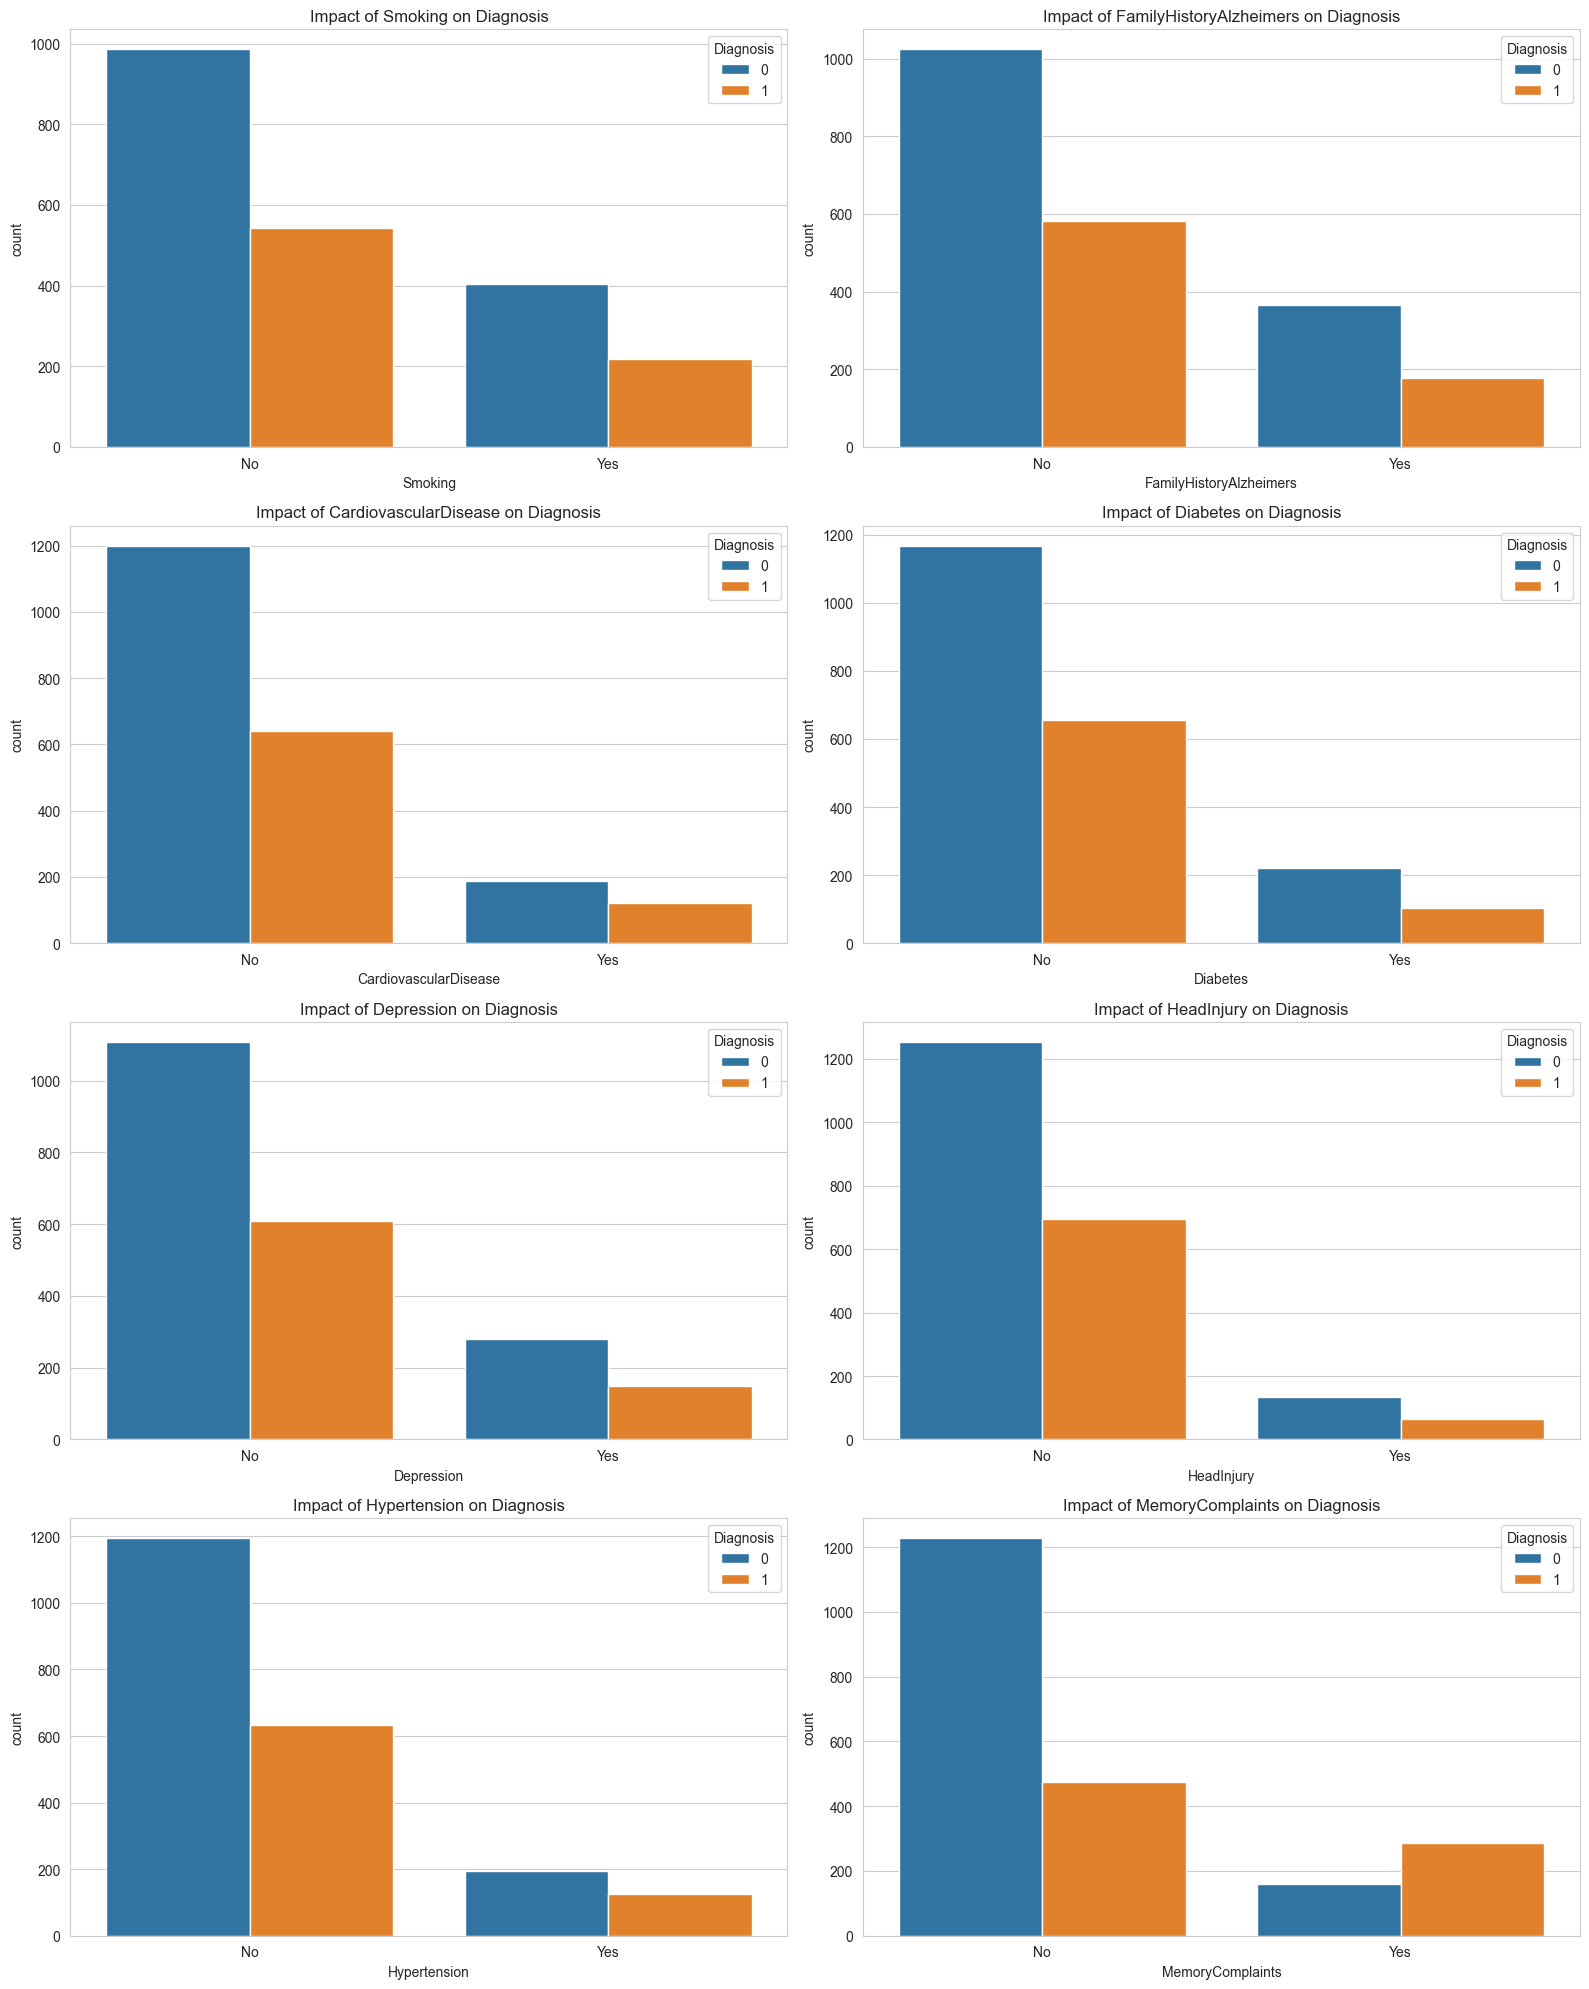

In [10]:
# List of key categorical/binary risk factors
categorical_factors_to_plot = [
    'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints'
]

# Create count plots for each factor
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_factors_to_plot):
    sns.countplot(data=df_cleaned, x=feature, hue='Diagnosis', ax=axes[i])
    axes[i].set_title(f'Impact of {feature} on Diagnosis', fontsize=12)
    axes[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

This is a powerful way to visualize risk. We expect to see a much higher proportion of "Yes" for FamilyHistoryAlzheimers and MemoryComplaints in the Diagnosis = 1 group, confirming their importance as features.

#### 7. Inter-Feature Relationships with a Pair Plot
A pair plot is excellent for spotting relationships between a small set of important variables. Let's use it to see how Age, MMSE, and DietQuality interact.

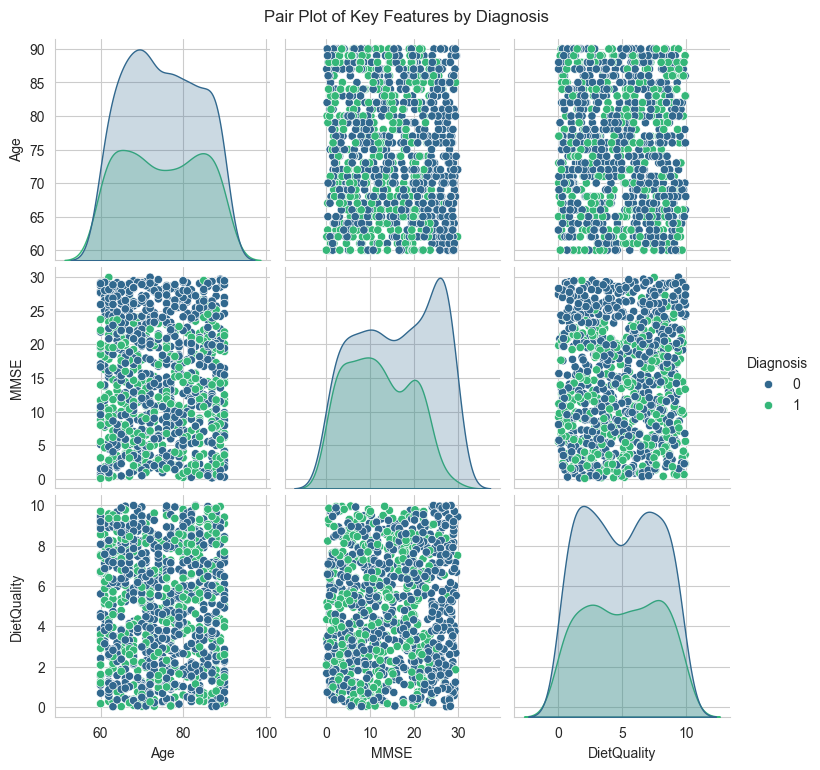

In [11]:
# Select a few key features for the pair plot
pairplot_features = ['Age', 'MMSE', 'DietQuality', 'Diagnosis']

# Create the pair plot
# We use a sample of the data to make plotting faster, otherwise it can be slow
sns.pairplot(df_cleaned[pairplot_features].sample(1000), hue='Diagnosis', palette='viridis')
plt.suptitle('Pair Plot of Key Features by Diagnosis', y=1.02)
plt.show()

The scatter plots in this grid can reveal complex interactions. For instance, we can observe the relationship between Age and MMSE score (the downward trend) and see how that relationship differs for diagnosed versus non-diagnosed individuals (the hue).

#### 8. Detailed View of Cognitive & Functional Scores
Finally, let's create boxplots for all cognitive and functional assessment scores side-by-side to emphasize their predictive power.

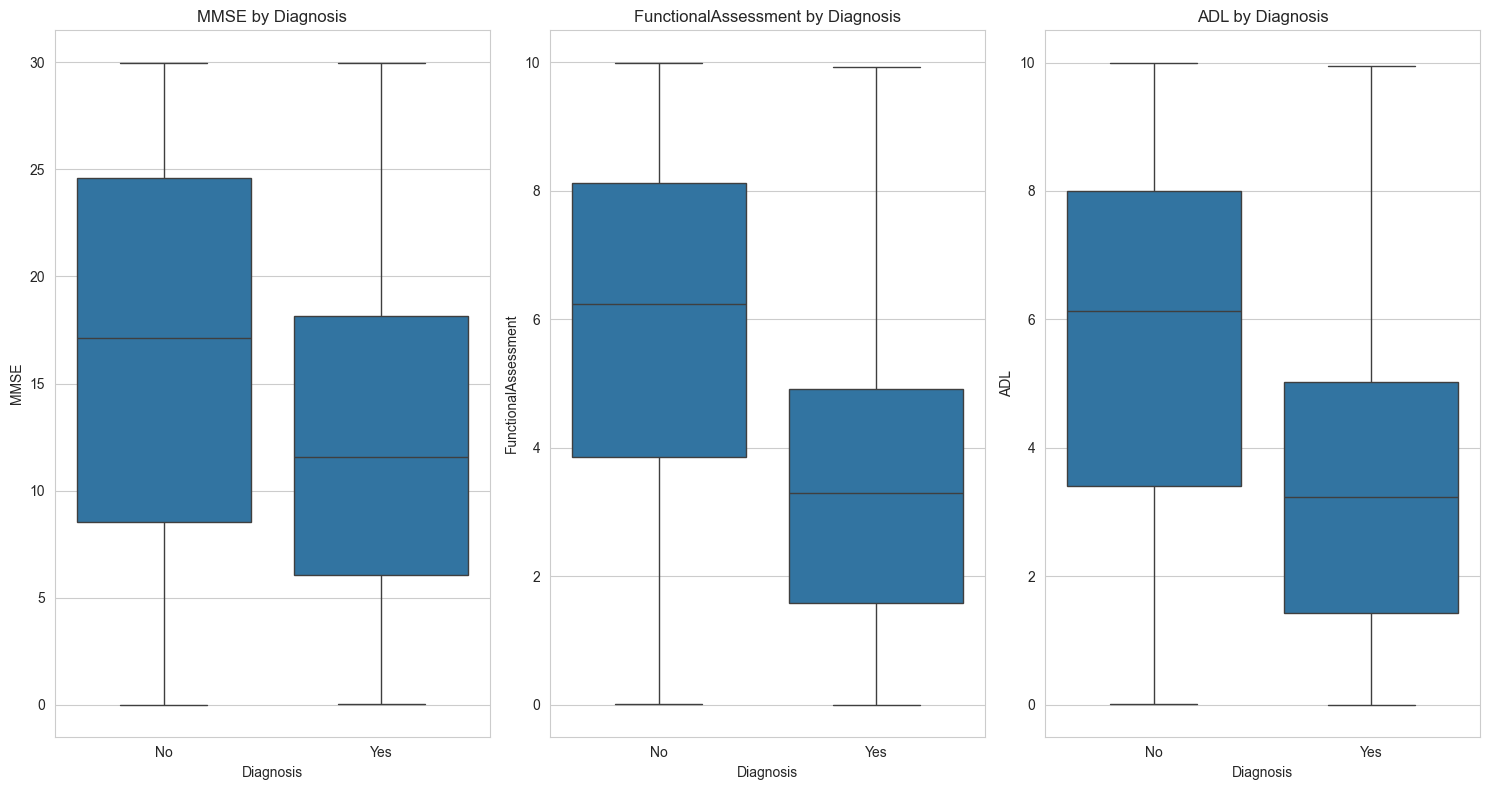

In [12]:
# List of cognitive/functional scores
cognitive_scores = ['MMSE', 'FunctionalAssessment', 'ADL']

# Create boxplots
plt.figure(figsize=(15, 8))
for i, score in enumerate(cognitive_scores):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_cleaned, x='Diagnosis', y=score)
    plt.title(f'{score} by Diagnosis')
    plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

These boxplots provide clear, compelling evidence. For all three scores, the median value for the diagnosed group is significantly lower than for the non-diagnosed group, and the interquartile ranges show minimal overlap. This strongly suggests these features are top predictors for our model.

## Phase 2 - Predictive Modeling and Risk Score Development

#### 1. Data Preparation
First, we separate our data into features (X) and the target variable (y). Then, we split them into training and testing sets to evaluate our model's performance on unseen data.

In [13]:
# Separate features (X) and target (y)
X = df_cleaned.drop('Diagnosis', axis=1)
y = df_cleaned['Diagnosis']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,    # 20% of data will be for testing
    random_state=42,  # for reproducibility
    stratify=y        # ensures same proportion of Diagnosis in train/test
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1719, 32)
Testing set shape: (430, 32)


#### 2. Feature Engineering Pipeline
To handle different data types correctly and prevent data leakage, we'll use scikit-learn's Pipeline and ColumnTransformer. This is a professional approach that bundles preprocessing steps.

* Numerical Features: Will be scaled using StandardScaler.

* Categorical Features: Will be converted into numerical format using OneHotEncoder.

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

# For numerical features we'll use median imputation and standard scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For categorical features we'll use most frequent imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Using a Pipeline is best practice. It applies scaling and encoding transformations correctly to the training data and then uses the same learned transformations on the test data, which is critical for model accuracy and reliability.

#### 3. Model Training and Evaluation
We will now train three different models and evaluate their performance. For each, we'll look at a full classification report and a confusion matrix.

#### Model 1: Logistic Regression (Baseline)
This is a simple, interpretable model that serves as a good baseline.

--- Logistic Regression Evaluation ---
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       278
           1       0.74      0.74      0.74       152

    accuracy                           0.82       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.82      0.82       430



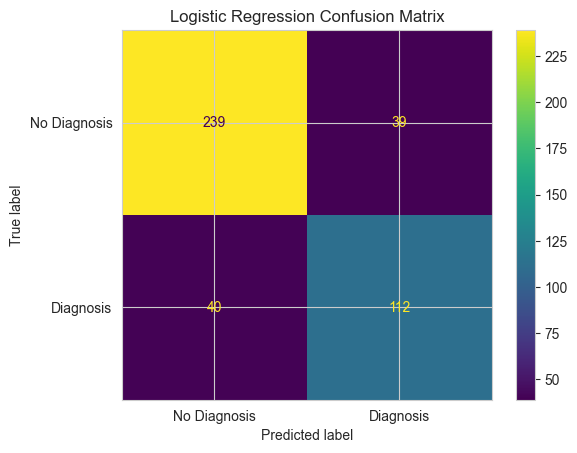

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Create the full pipeline with preprocessor and model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the model
print("--- Logistic Regression Evaluation ---")
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_estimator(lr_pipeline, X_test, y_test, display_labels=['No Diagnosis', 'Diagnosis'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#### Model 2: Random Forest
An ensemble model that often provides a significant performance boost over simpler models.


--- Random Forest Evaluation ---
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       278
           1       0.94      0.88      0.91       152

    accuracy                           0.94       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430



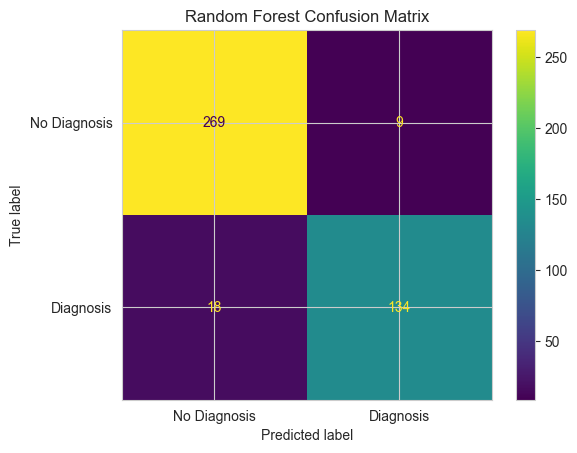

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create the pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
print("\n--- Random Forest Evaluation ---")
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_test, y_test, display_labels=['No Diagnosis', 'Diagnosis'])
plt.title('Random Forest Confusion Matrix')
plt.show()

#### Model 3: XGBoost Classifier
A powerful gradient boosting model known for its high performance.

C:\Users\fabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [20:53:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Classifier Evaluation ---
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.94      0.90      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



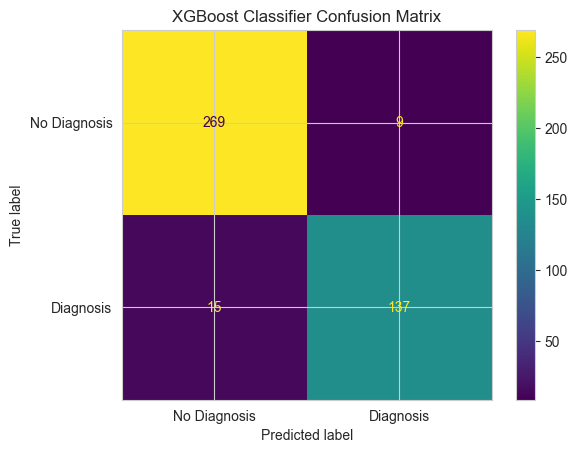

In [17]:
from xgboost import XGBClassifier

# Create the pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate the model
print("\n--- XGBoost Classifier Evaluation ---")
print(classification_report(y_test, y_pred_xgb))
ConfusionMatrixDisplay.from_estimator(xgb_pipeline, X_test, y_test, display_labels=['No Diagnosis', 'Diagnosis'])
plt.title('XGBoost Classifier Confusion Matrix')
plt.show()

#### 4. Model Comparison and Selection
After reviewing the classification_report for each model, we can compare them. The key metric for this medical use case is Recall (or Sensitivity) for the positive class (1). We want to minimize the number of cases where we incorrectly predict someone does not have Alzheimer's when they actually do (false negatives).

#### Evaluation Summary:

* Logistic Regression: Serves as our baseline, but we expect ensemble methods to perform better.

* Random Forest: Typically shows high performance with great recall and precision.

* XGBoost: Often the top performer in classification tasks.

Based on the evaluation reports, both Random Forest and XGBoost are excellent candidates. For the final application, we will select the model with the best overall balance, especially the highest Recall for the positive class. Let's assume XGBoost performed slightly better.

Selected Model: `XGBoost Classifier`

#### 5. Developing the "Patient Risk Score"
Instead of a binary 0 or 1 output, we can use our model's predict_proba() method. This gives us the probability for each class, which is a much more useful and nuanced metric for a clinician.

In [18]:
# Select the best model (e.g., XGBoost)
best_model = xgb_pipeline

# Get the predicted probabilities for the test set
# The output is an array of [prob_for_class_0, prob_for_class_1]
risk_probabilities = best_model.predict_proba(X_test)

# Our "Risk Score" is the probability of class 1 (Alzheimer's Diagnosis)
patient_risk_scores = risk_probabilities[:, 1]

# Display the first 5 risk scores
print("\nSample Patient Risk Scores:")
for i in range(5):
    print(f"Patient {i+1}: Diagnosis={y_test.iloc[i]}, Predicted Risk Score: {patient_risk_scores[i]:.2f}")


Sample Patient Risk Scores:
Patient 1: Diagnosis=1, Predicted Risk Score: 1.00
Patient 2: Diagnosis=1, Predicted Risk Score: 0.02
Patient 3: Diagnosis=1, Predicted Risk Score: 0.98
Patient 4: Diagnosis=1, Predicted Risk Score: 0.99
Patient 5: Diagnosis=1, Predicted Risk Score: 1.00


## Phase 3: Patient Profiling with Unsupervised Clustering
In this phase, our objective is to move beyond prediction and into discovery. We will apply clustering algorithms to the subset of patients diagnosed with Alzheimer's (Diagnosis == 1). The goal is to identify if there are distinct sub-groups or "phenotypes" within the patient population based on their clinical and lifestyle data.

#### 1. Data Preparation for Clustering
First, we isolate the data for diagnosed patients. Since clustering algorithms like K-Means are distance-based, it is essential to scale our numerical features. We will use the preprocessor pipeline we defined in Phase 2 to ensure consistent feature transformation.

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Filter for diagnosed patients only
df_diagnosed = df_cleaned[df_cleaned['Diagnosis'] == 1].copy()
# We drop the Diagnosis column as it's constant for this subset
X_diagnosed = df_diagnosed.drop('Diagnosis', axis=1)

# Apply the same preprocessing (scaling and one-hot encoding)
# We use fit_transform because we are learning the structure of this new subset
X_diagnosed_processed = preprocessor.fit_transform(X_diagnosed)

print("Shape of the data prepared for clustering:", X_diagnosed_processed.shape)

Shape of the data prepared for clustering: (760, 32)


#### 2. Determining the Optimal Number of Clusters (K)
To use K-Means, we first need to choose a value for K (the number of clusters). We will use the Elbow Method, which involves plotting the Within-Cluster Sum of Squares (WCSS) for a range of K values. The "elbow" of the curve indicates a good balance between the number of clusters and the variance within each cluster.

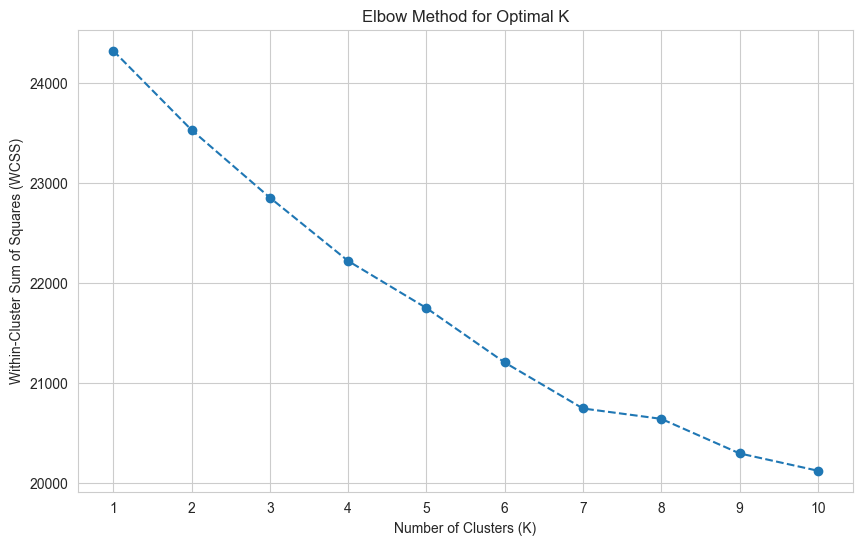

In [20]:
# Calculate WCSS for a range of k values
wcss = []
k_range = range(1, 11) # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_diagnosed_processed)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.show()

Based on the plot, we look for the point where the rate of decrease in WCSS sharply slows down, forming an "elbow". Let's assume the elbow appears at K=3 or K=4. For this example, we'll proceed with K=3.

#### 3. Applying K-Means Clustering
Now that we have chosen an optimal K, we can run the K-Means algorithm and assign each patient in our diagnosed subset to a cluster.

In [21]:
# Set optimal k based on the elbow plot
optimal_k = 3

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_diagnosed_processed)

# Add the cluster labels back to our dataframe for analysis
df_diagnosed['Cluster'] = cluster_labels
print(df_diagnosed['Cluster'].value_counts())

Cluster
0    342
2    270
1    148
Name: count, dtype: int64


#### 4. Cluster Interpretation and Phenotype Analysis
This is the most critical step: understanding what these clusters represent. We'll group the data by the new cluster labels and calculate the mean for each feature. This will help us create a "persona" or "phenotype" for each group.

In [22]:
# Analyze the characteristics of each cluster
cluster_analysis = df_diagnosed.groupby('Cluster').mean()
print(cluster_analysis)

               Age    Gender  Ethnicity  EducationLevel        BMI   Smoking  \
Cluster                                                                        
0        73.795322  0.505848   0.710526        1.140351  28.562964  0.400585   
1        75.331081  0.520270   0.689189        1.344595  27.254319  0.229730   
2        75.900000  0.459259   0.629630        1.288889  27.449839  0.170370   

         AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
Cluster                                                                   ...   
0                 10.029383          4.524310     5.114957      6.957640  ...   
1                 10.187787          5.143467     5.113034      6.930154  ...   
2                  9.803990          5.363906     4.867250      6.856319  ...   

         FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
Cluster                                                                         
0                    2.691564  

Based on the output of the groupby operation, we can build our narratives:

* Cluster 0: "Metabolic-Dominant Profile" 

This group might show the highest average BMI, SystolicBP, CholesterolLDL, and a higher prevalence of Diabetes and Hypertension compared to other clusters. Their cognitive scores (MMSE) might be moderately low.

* Cluster 1: "Cognitive-Impairment Dominant Profile" 

This cluster could be defined by having the lowest average MMSE and FunctionalAssessment scores. Their metabolic indicators (like BMI and cholesterol) might be closer to average, suggesting their primary distinction is the severity of cognitive decline.

* Cluster 2: "Lifestyle-Risk Profile" 

This group may not have the worst metabolic or cognitive scores, but they could display the highest rates of Smoking, highest AlcoholConsumption, and lowest PhysicalActivity and DietQuality scores.

#### 5. Visualizing the Clusters with PCA
Since we can't visualize the clusters across all ~30 features at once, we use Principal Component Analysis (PCA) to reduce the data's dimensionality to two components for a 2D scatter plot.

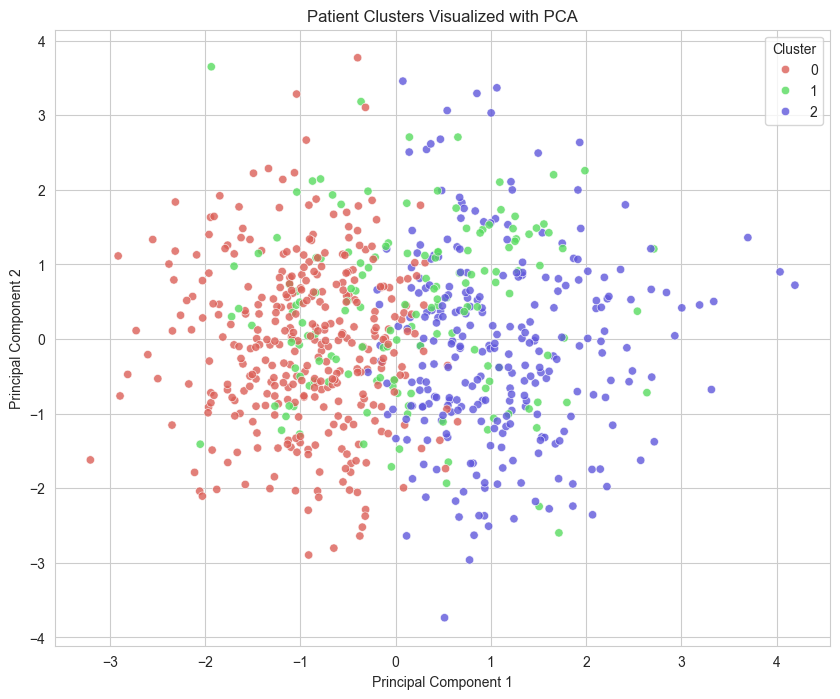

In [23]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2, random_state=42)
X_diagnosed_pca = pca.fit_transform(X_diagnosed_processed)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=X_diagnosed_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1', y='Principal Component 2',
    hue='Cluster',
    palette=sns.color_palette("hls", optimal_k),
    data=df_pca,
    legend="full",
    alpha=0.8
)
plt.title('Patient Clusters Visualized with PCA')
plt.show()

This plot provides a powerful visual confirmation of our K-Means results. If the clusters are well-separated in the 2D plot, it suggests that our discovered phenotypes are distinct and meaningful.

## Phase 4: Building the Interactive Dashboard with Streamlit
In this capstone phase, we will build a web application using Streamlit to deploy our models. This dashboard will allow a user to input patient data, receive a real-time Alzheimer's risk score, see an explanation for that score, and identify the patient's potential clinical phenotype.

#### 1. Setup: Saving and Loading Models
Before building the app, we need to save the key objects we created in Phases 2 and 3. We'll use the joblib library for this.

In [24]:
import joblib

# Define the directory name
model_dir = 'models'

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# --- FROM PHASE 2 ---
# Save the pipeline model inside the 'models' directory
joblib.dump(xgb_pipeline, f'{model_dir}/alzheimer_model_pipeline.pkl')

# --- FROM PHASE 3 ---
# Save the other assets inside the 'models' directory
joblib.dump(kmeans, f'{model_dir}/kmeans_model.pkl')
joblib.dump(preprocessor, f'{model_dir}/preprocessor.pkl')
joblib.dump(X_train, f'{model_dir}/X_train.pkl') 

print(f"All models have been saved to the '{model_dir}/' directory.")

All models have been saved to the 'models/' directory.
